<a href="https://colab.research.google.com/github/cjh060331/nvidia-yolo/blob/main/yolov8_%EC%8B%9C%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 1280＿pngtree－cats－and－dogs－png－image＿17281259.png to 1280＿pngtree－cats－and－dogs－png－image＿17281259 (1).png

image 1/1 /content/yolov5/yolov5/yolov5/1280＿pngtree－cats－and－dogs－png－image＿17281259 (1).png: 640x640 3 cats, 6 dogs, 4722.9ms
Speed: 3.5ms preprocess, 4722.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


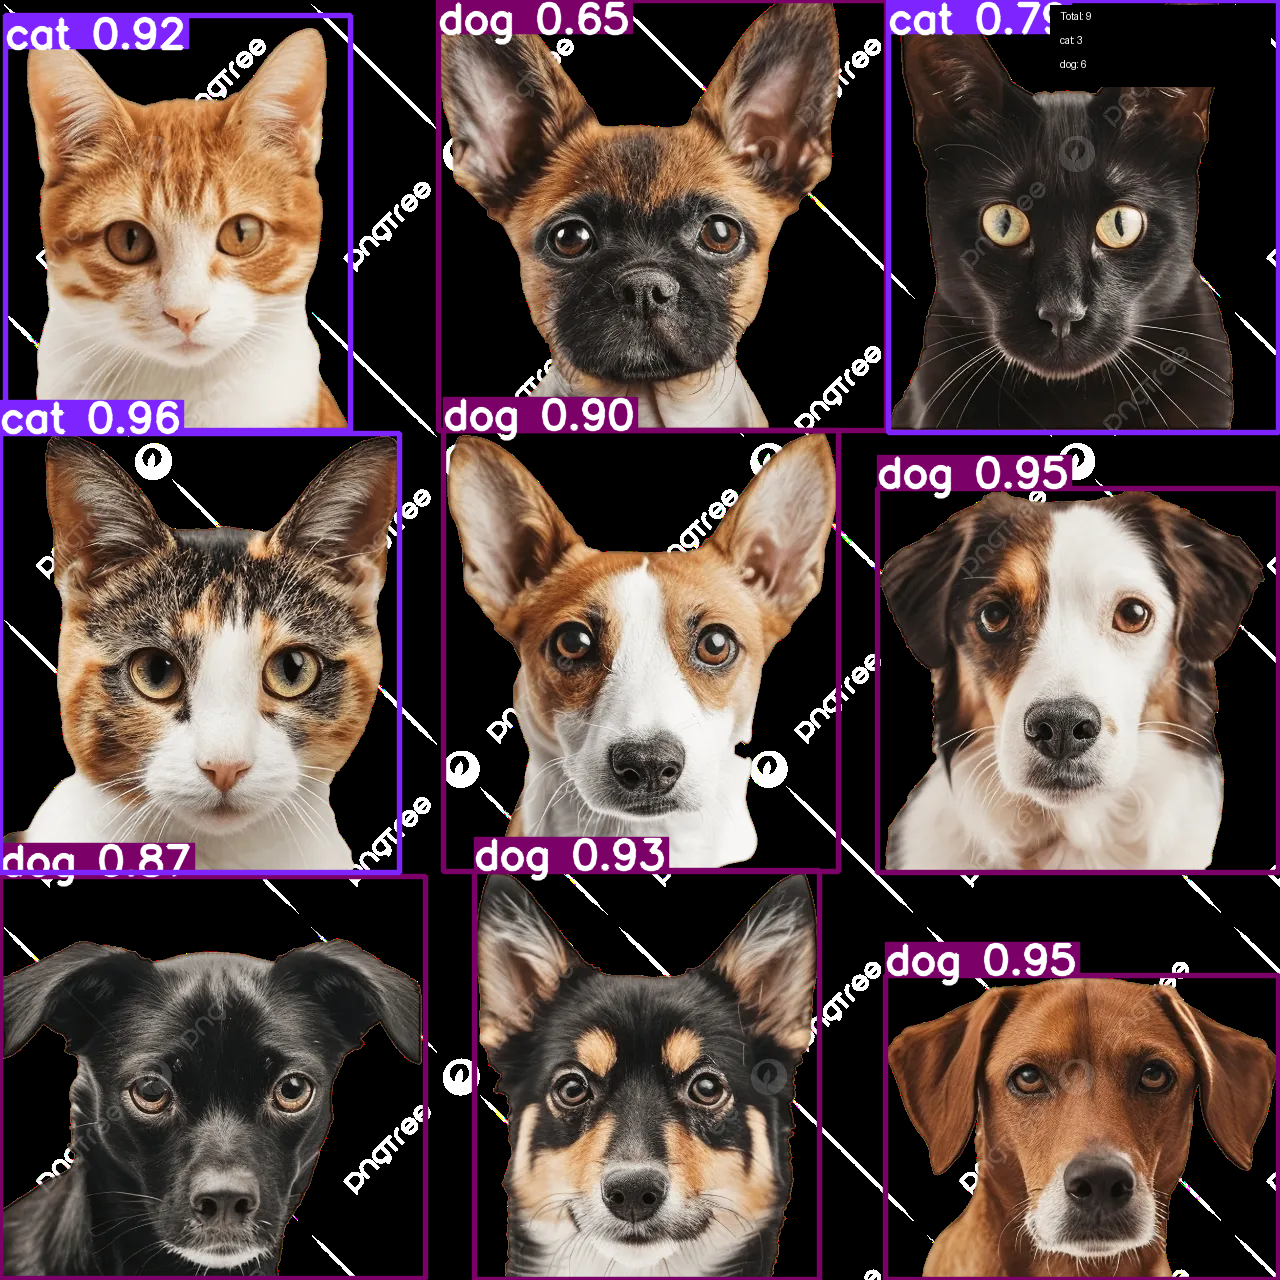

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# -----------------------------------
# 1. YOLO** 설치
# -----------------------------------
%pip install ultralytics --upgrade -q

# -----------------------------------
# 2. 이미지 업로드
# -----------------------------------
from google.colab import files
uploaded = files.upload()
image_path = next(iter(uploaded))  # 업로드한 첫 번째 이미지 파일명

# -----------------------------------
# 3. YOLO** 모델 로드 및 이미지 분석
# -----------------------------------
from ultralytics import YOLO

# 사전 학습된 YOLO** 모델 로드
model = YOLO('yolov8x.pt')

# 이미지 감지 수행
results = model(image_path)

# 첫 번째 결과만 사용
result = results[0]

# -----------------------------------
# 4. 객체 수 세기
# -----------------------------------
from collections import Counter

# 클래스 이름 불러오기
names = model.names  # 클래스 인덱스를 이름으로 매핑
class_ids = result.boxes.cls.tolist()
class_names = [names[int(cls_id)] for cls_id in class_ids]

# 객체별 개수 세기
object_counts = Counter(class_names)
total_objects = len(class_names)

# -----------------------------------
# 5. 이미지에 객체 개수 오버레이 표시
# -----------------------------------
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# YOLOv8에서 처리된 결과 이미지 (BGR) 불러오기
plot_img = result.plot()  # numpy 배열 (BGR)
plot_img = cv2.cvtColor(plot_img, cv2.COLOR_BGR2RGB)  # RGB로 변환

# PIL 이미지로 변환
img = Image.fromarray(plot_img)
draw = ImageDraw.Draw(img)

# 텍스트 준비
text_lines = [f'Total: {total_objects}'] + [f'{name}: {count}' for name, count in object_counts.items()]

# 폰트 설정
font_size = 20
try:
    font = ImageFont.truetype("arial.ttf", font_size)
except:
    font = ImageFont.load_default()

# 텍스트 위치 및 배경박스
x, y = img.width - 220, 10
line_height = font_size + 4
box_height = line_height * len(text_lines) + 4
draw.rectangle([x - 10, y - 5, img.width - 10, y + box_height], fill=(0, 0, 0, 160))

# 텍스트 그리기
for i, line in enumerate(text_lines):
    draw.text((x, y + i * line_height), line, fill=(255, 255, 255), font=font)

# -----------------------------------
# 6. 결과 출력 및 다운로드
# -----------------------------------
import IPython.display as display

# 결과 이미지 저장
output_path = 'yolov8_result_with_counts.jpg'
img.save(output_path)

# 결과 이미지 표시
display.display(img)

# 다운로드 링크 제공
files.download(output_path)